In [1]:
# Primeiro passo: importar os módulos necessários
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Segundo passo: definir uma função e sua derivada (para utilizar o Método de Newton)
def f(x):
    # return -x * np.e ** -x + 0.2
    return x*x - 5

def f_linha(x):
    # return np.e ** -x * (x - 1)
    return 2 * x

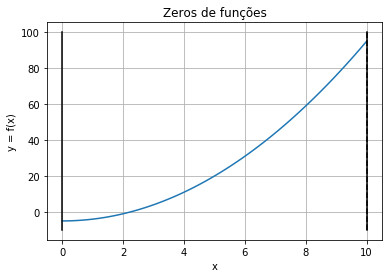

In [3]:
# Terceiro passo: visualizar a função definida
x = np.linspace(0, 10, 100)
y = f(x)

def plot_function(interval_min, interval_max, point_inside_interval):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y = f(x)')
    plt.title('Zeros de funções')
    plt.grid()

    [xmin, xmax, ymin, ymax] = plt.axis()
    plt.plot([point_inside_interval, point_inside_interval], [ymin, ymax], 'k--')
        
    if interval_min != interval_max:
        plt.plot([interval_min, interval_min], [ymin, ymax], 'k-')
        plt.plot([interval_max, interval_max], [ymin, ymax], 'k-')
    
    plt.show()

plot_function(0, 10, 10)

In [4]:
# Métodos da Bisseção e Posição Falsa
# -----------------------------------

# Definir o intervalo inicial
A = 1
B = 10

# Definir condições de parada
x_tol = 0.0001
y_tol = 0.0001
x_anterior = B

# Definir variável auxiliar para contagem de iterações
counter = 1

while True:
    # Encontrar a próxima aproximação da raíz da função
#     xi = (B + A) / 2                           # Método da Bisseção
    xi = (A * f(B) - B * f(A)) / (f(B) - f(A)) # Método da Posição Falsa

    # Visualizar o gráfico
    # plot_function(A, B, xi)
    print('%2d: f(%+.6f) = %+.6f' % (counter, xi, f(xi)))
    counter += 1

    # Definir o novo intervalo
    if f(A) * f(xi) < 0:
        B = xi
    elif f(A) * f(xi) == 0:
        print('raiz encontrada: %.6lf' % xi)
    else:
        A = xi

    # Checar as condições de parada
    # Eixo Y
    if abs(f(xi)) < y_tol:
        break
    # Eixo X
    if abs(x_anterior - xi) < x_tol:
        break
    x_anterior = xi

 1: f(+1.363636) = -3.140496
 2: f(+1.640000) = -2.310400
 3: f(+1.838488) = -1.619962
 4: f(+1.975327) = -1.098085
 5: f(+2.067022) = -0.727419
 6: f(+2.127304) = -0.474579
 7: f(+2.166437) = -0.306551
 8: f(+2.191633) = -0.196743
 9: f(+2.207771) = -0.125748
10: f(+2.218072) = -0.080159
11: f(+2.224632) = -0.051012
12: f(+2.228805) = -0.032428
13: f(+2.231457) = -0.020600
14: f(+2.233141) = -0.013081
15: f(+2.234210) = -0.008304
16: f(+2.234889) = -0.005271
17: f(+2.235320) = -0.003345
18: f(+2.235593) = -0.002123
19: f(+2.235767) = -0.001347
20: f(+2.235877) = -0.000855
21: f(+2.235947) = -0.000542


In [ ]:
# Métodos da Posição Falsa com o algoritmo de Illinois
# ----------------------------------------------------

# Definir o intervalo inicial
A = 1
B = 10

# Definir condições de parada
x_tol = 0.0001
y_tol = 0.0001
x_anterior = B

# Definir variável auxiliar para o algoritmo de Illinois
interval_chosen = 0

# Definir variável auxiliar para contagem de iterações
counter = 1

while True:
    # Encontrar a próxima aproximação da raíz da função
    if interval_chosen == 2:
        xi = (A * (f(B)/2) - B * f(A)) / ((f(B)/2) - f(A))
        interval_chosen -= 1
    elif interval_chosen == -2:
        xi = (A * f(B) - B * (f(A)/2)) / (f(B) - (f(A)/2))
        interval_chosen += 1
    else:
        xi = (A * f(B) - B * f(A)) / (f(B) - f(A))

    # Visualizar o gráfico
    # plot_function(A, B, xi)
    print('%2d: f(%+.6f) = %+.6f' % (counter, xi, f(xi)))
    counter += 1

    # Definir o novo intervalo
    if f(A) * f(xi) < 0:
        B = xi
        interval_chosen -= 1
    elif f(A) * f(xi) == 0:
        print('raiz encontrada: %.6lf' % xi)
    else:
        A = xi
        interval_chosen += 1

    # Checar as condições de parada
    # Eixo Y
    if abs(f(xi)) < y_tol:
        break
    # Eixo X
    if abs(x_anterior - xi) < x_tol:
        break
    x_anterior = xi

In [8]:
# Métodos de Newton e Ponto Fixo
# ------------------------------

# Definir ponto inicial
xi = 2

# Definir condições de parada
x_tol = 0.0001
y_tol = 0.0001
x_anterior = xi

# Definir variável auxiliar para contagem de iterações
counter = 1

while True:
    # Visualizar o gráfico
    # plot_function(0, 0, xi)
    print('%2d: f(%+.6f) = %+.6f' % (counter, xi, f(xi)))
    counter += 1

    # Encontrar a próxima aproximação da raíz
    xi = xi - f(xi) / f_linha(xi) # Método de Newton
    #xi = xi + f(xi) * 0.1 # Método do Ponto Fixo

    # Checar as condições de parada
    # Eixo Y
    if abs(f(xi)) < y_tol:
        break
    # Eixo X
    if abs(x_anterior - xi) < x_tol:
        break
    x_anterior = xi

# plot_function(0, 0, xi)
print('%2d: f(%+.6f) = %+.12f' % (counter, xi, f(xi)))

 1: f(+2.000000) = -1.000000
 2: f(+2.250000) = +0.062500
 3: f(+2.236111) = +0.000193
 4: f(+2.236068) = +0.000000001860


In [7]:
# Método da Secante
# -----------------

# Definir pontos iniciais
x_anterior = 1
xi = 3

# Definir condições de parada
x_tol = 0.0001
y_tol = 0.0001

# Definir variável auxiliar para contagem de iterações
counter = 1

while True:
    # Visualizar o gráfico
    # plot_function(0, 0, xi)
    print('%2d: f(%+.6f) = %+.6f' % (counter, xi, f(xi)))
    counter += 1

    # Encontrar a próxima aproximação da raíz
    derivada = (f(xi) - f(x_anterior)) / (xi - x_anterior)
    x_anterior = xi
    xi = xi - f(xi) / derivada

    # Checar as condições de parada
    # Eixo Y
    if abs(f(xi)) < y_tol:
        break
    # Eixo X
    if abs(x_anterior - xi) < x_tol:
        break

# plot_function(0, 0, xi)
print('%2d: f(%+.6f) = %+.12f' % (counter, xi, f(xi)))

 1: f(+3.000000) = +4.000000
 2: f(+2.000000) = -1.000000
 3: f(+2.200000) = -0.160000
 4: f(+2.238095) = +0.009070
 5: f(+2.236052) = -0.000073679751
